<a href="https://colab.research.google.com/github/adildhkh/deep-learning/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers, datasets

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Determine the number of classes
k = len(set(y_train))  # CIFAR-10 has 10 classes

# Build the model using Functional API
inputs = layers.Input(shape=(32, 32, 3))

# First convolutional layer
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu')(inputs)

# Second convolutional layer
x = layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)

# Third convolutional layer
x = layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# Flatten the feature map
x = layers.Flatten()(x)

# Dropout layer with 0.5
x = layers.Dropout(0.5)(x)

# Fully connected dense layer with 1024 units
x = layers.Dense(1024, activation='relu')(x)

# Dropout layer with 0.2
x = layers.Dropout(0.2)(x)

# Output layer with k classes and softmax activation
outputs = layers.Dense(k, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3471 - loss: 1.7710 - val_accuracy: 0.5371 - val_loss: 1.2747
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5258 - loss: 1.3240 - val_accuracy: 0.5832 - val_loss: 1.1620
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5804 - loss: 1.1790 - val_accuracy: 0.6147 - val_loss: 1.0692
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6178 - loss: 1.0722 - val_accuracy: 0.6476 - val_loss: 0.9861
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6454 - loss: 0.9985 - val_accuracy: 0.6621 - val_loss: 0.9563
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6639 - loss: 0.9471 - val_accuracy: 0.6775 - val_loss: 0.9130
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6860 - loss: 0.8863 - val_accuracy: 0.6874 - val_loss: 0.9171
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6967 - loss: 0.8469

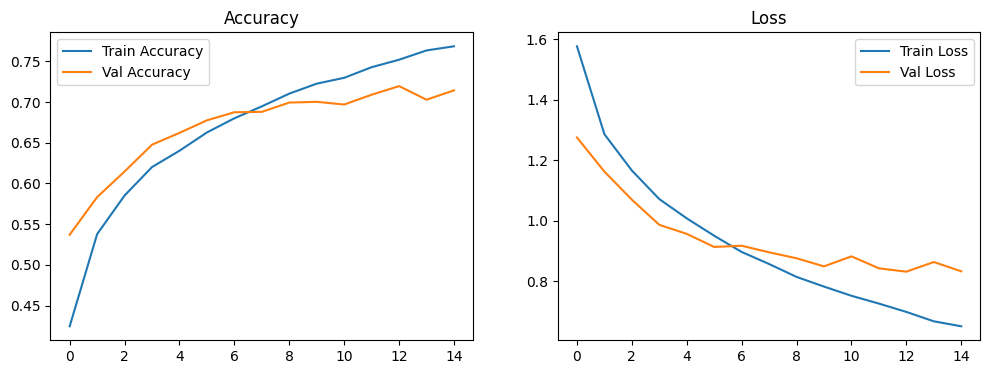

In [4]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


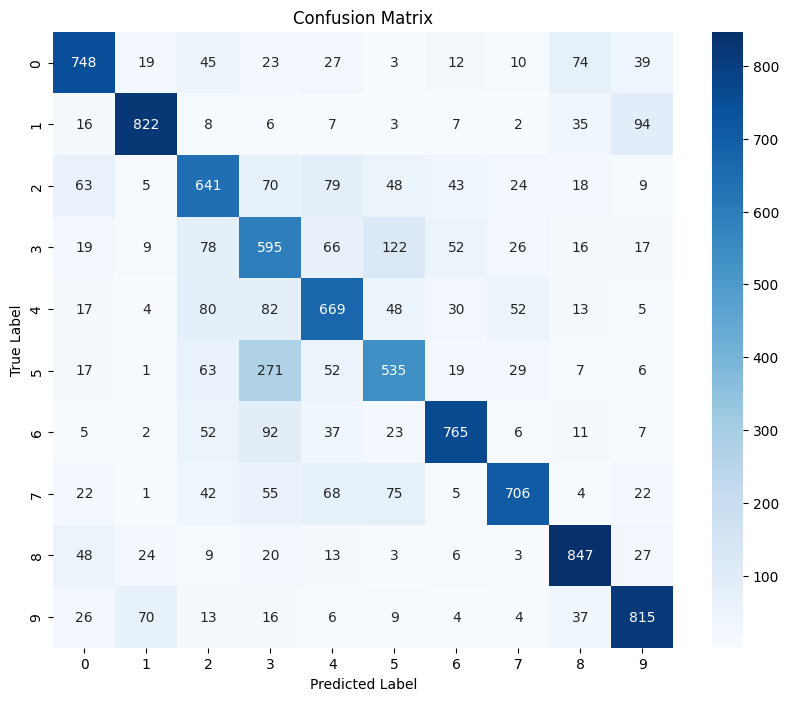

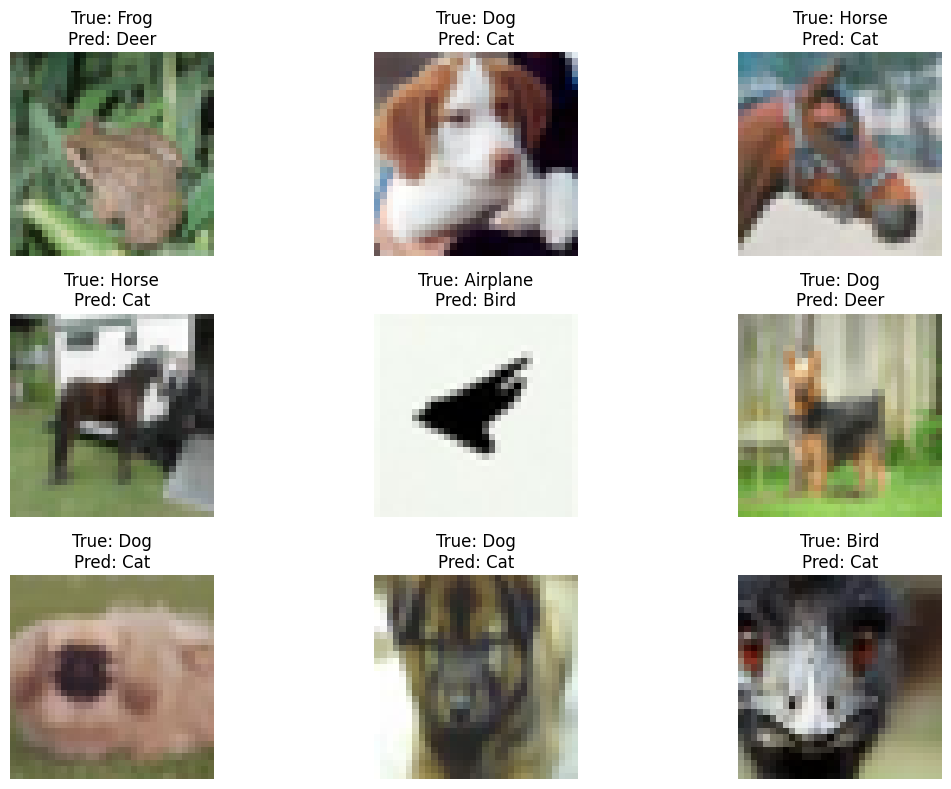

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(k), yticklabels=range(k))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Class names for CIFAR-10 dataset
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Find misclassified images
misclassified_indices = np.where(y_pred_classes != y_test)[0]

# Display a few misclassified images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    true_label = class_names[y_test[idx]]
    predicted_label = class_names[y_pred_classes[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.3235 - loss: 1.8344 - val_accuracy: 0.4727 - val_loss: 1.4726
Epoch 2/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5000 - loss: 1.2799

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5000 - loss: 1.2799 - val_accuracy: 0.4541 - val_loss: 1.5433
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4823 - loss: 1.4260 - val_accuracy: 0.5658 - val_loss: 1.2053
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.7188 - loss: 1.1042 - val_accuracy: 0.5653 - val_loss: 1.1986
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.5306 - loss: 1.3082 - val_accuracy: 0.5974 - val_loss: 1.1124
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7500 - loss: 0.8344 - val_accuracy: 0.6000 - val_loss: 1.1118
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5572 - loss: 1.2349 - val_accuracy: 0.6340 - val_loss: 1.0424
Epoch 8/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.5000 - loss: 1.5188 - val_accuracy: 0.6342 - val_loss: 1.0445
Epoch 9/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5804 - loss: 1.18

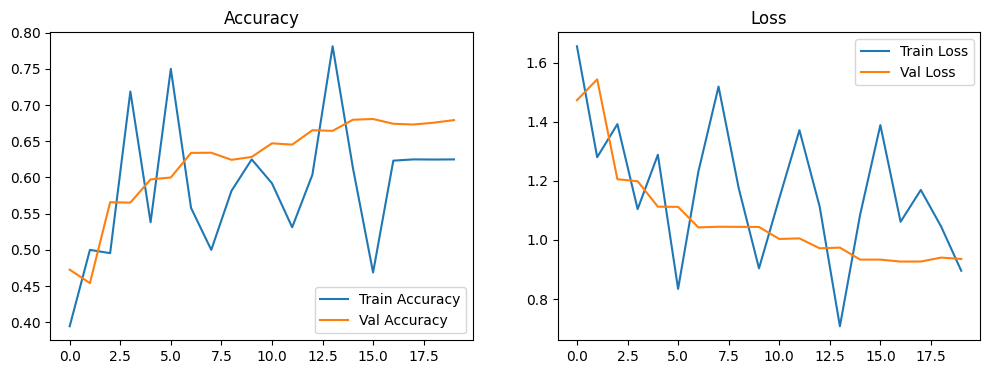

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # Shift width by up to 10% of the image
    height_shift_range=0.1,  # Shift height by up to 10% of the image
    horizontal_flip=True  # Randomly flip images horizontally
)

# Use the data generator with the training data
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Modify the model training to use the generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,  # Number of batches per epoch
    epochs=20,  # Train for 50 epochs
    validation_data=(x_test, y_test)  # Validation data remains the same
)

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


Epoch 1/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.3382 - loss: 1.9821 - val_accuracy: 0.4867 - val_loss: 1.5939
Epoch 2/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.5938 - loss: 1.4697 - val_accuracy: 0.4577 - val_loss: 1.7816
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5705 - loss: 1.2123 - val_accuracy: 0.6181 - val_loss: 1.2176
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.6250 - loss: 1.4769 - val_accuracy: 0.6143 - val_loss: 1.2581
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6580 - loss: 0.9912 - val_accuracy: 0.6184 - val_loss: 1.2038
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.6562 - loss: 1.2011 - val_accuracy: 0.6070 - val_loss: 1.2697
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7060 - loss: 0.8616 - val_accuracy: 0.7310 - val_loss: 0.7948
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.5625 -

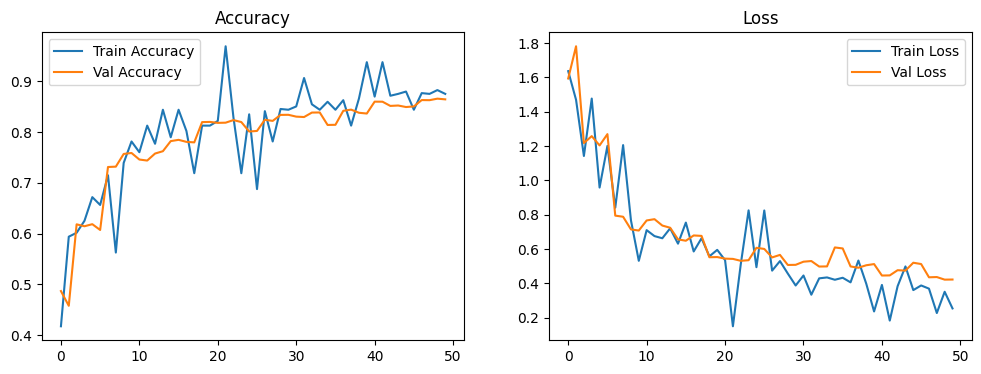

In [5]:
from tensorflow.keras import layers, Model, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Determine the number of classes
k = len(set(y_train))

# Build the CNN with Batch Normalization
inputs = layers.Input(shape=(32, 32, 3))

# First set of Conv layers with 32 filters
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Second set of Conv layers with 64 filters
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Third set of Conv layers with 128 filters
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten the output
x = layers.Flatten()(x)

# Dropout with 0.2
x = layers.Dropout(0.2)(x)

# Dense layer with 1024 units
x = layers.Dense(1024, activation='relu')(x)

# Dropout with 0.5
x = layers.Dropout(0.5)(x)

# Output layer with k classes
outputs = layers.Dense(k, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Train the model using the generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=50,
    validation_data=(x_test, y_test)
)

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


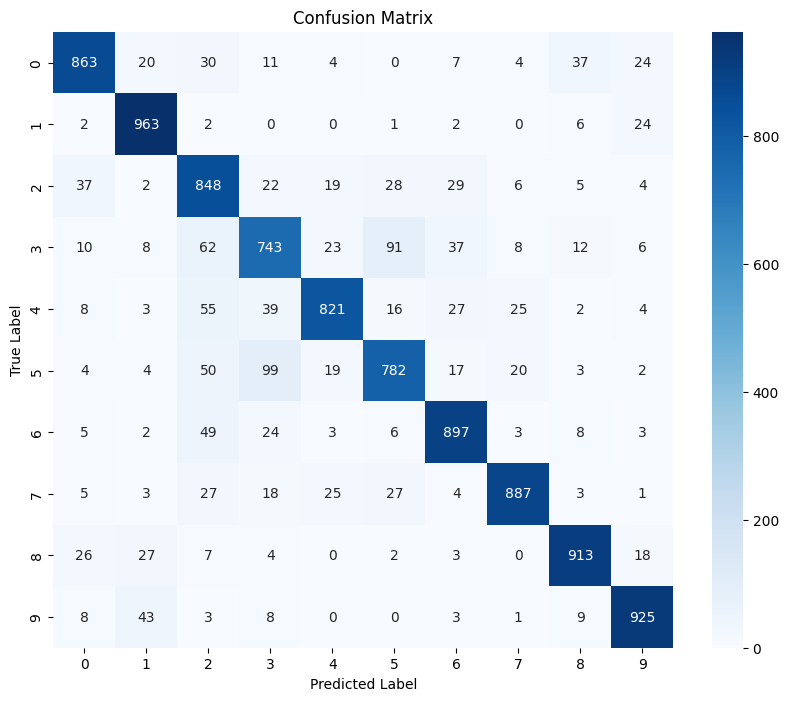

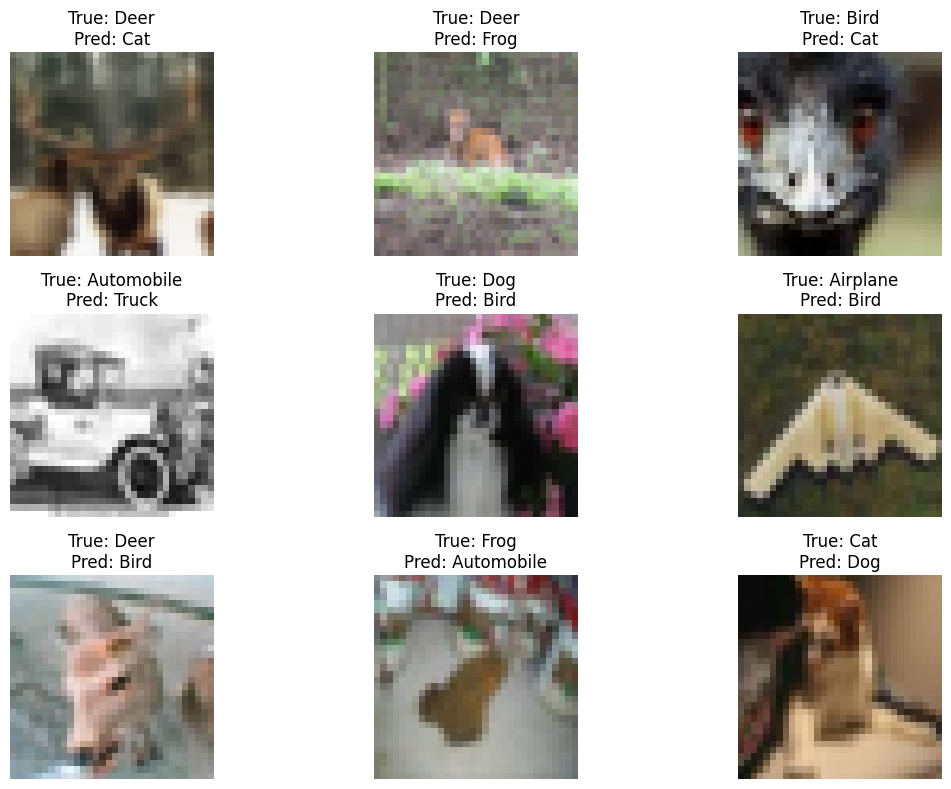

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(k), yticklabels=range(k))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Class names for CIFAR-10 dataset
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Find misclassified images
misclassified_indices = np.where(y_pred_classes != y_test)[0]

# Display a few misclassified images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    true_label = class_names[y_test[idx]]
    predicted_label = class_names[y_pred_classes[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
# Save the model in the current directory as 'cifar10_model'
model.save('cifar10_model')


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=cifar10_model.

In [8]:
# Save the model in HDF5 format
model.save('cifar10_model.h5')


In [9]:
# Save the model in the native Keras format
model.save('cifar10_model.keras')
